
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [720]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [721]:
my_cols = pd.read_csv('./data/heart_disease/columns.csv', skipinitialspace=True).column.values.tolist()
dataset = pd.read_csv('./data/heart_disease/processed.cleveland.data', delimiter=',',  header=0, names = my_cols)

# Análisis exploratorio básico y preprocesamiento de los datos


Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

## Análisis Exploratorio.

In [722]:
dataset.shape

(302, 14)

In [723]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [724]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


Hay algo raro en las columnas 'ca' y 'thal', xq deberían ser del tipo float64.

In [725]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

No son valores NaN o Null. Viendo los datos se observa que está el caracter '?' en las columnas  'ca' y 'thal'

In [726]:
dataset = dataset.replace('?',np.nan)
dataset = dataset.apply(pd.to_numeric)


In [727]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [728]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  num       302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [729]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [730]:
# num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)
dataset["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

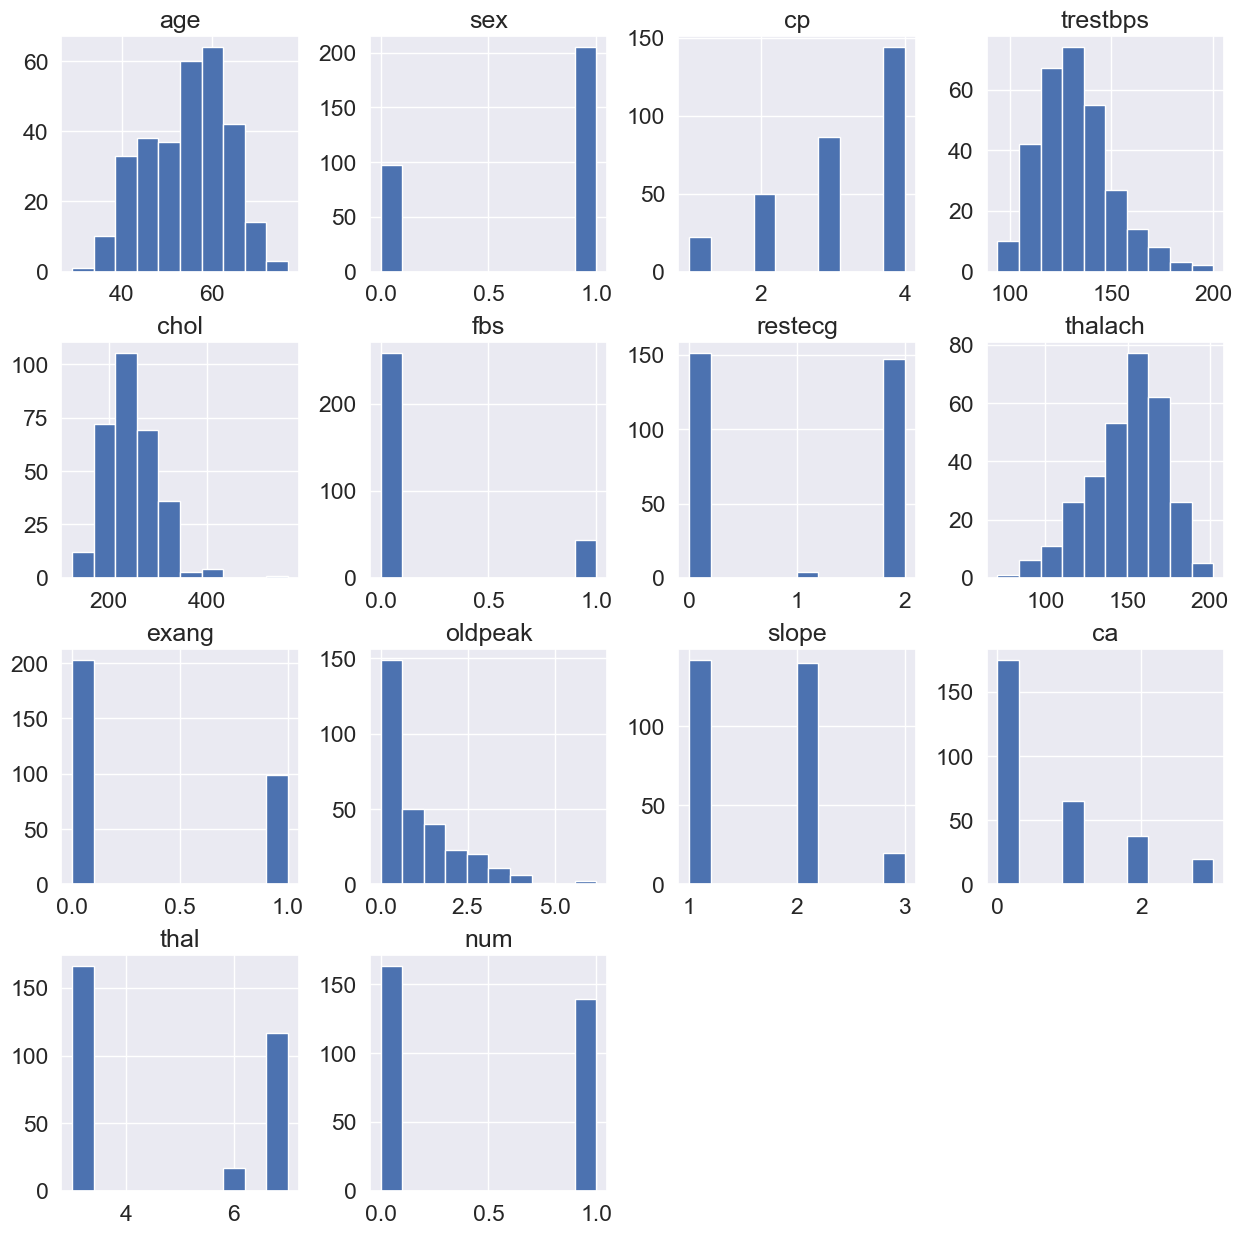

In [731]:
dataset.hist(figsize=(15,15))

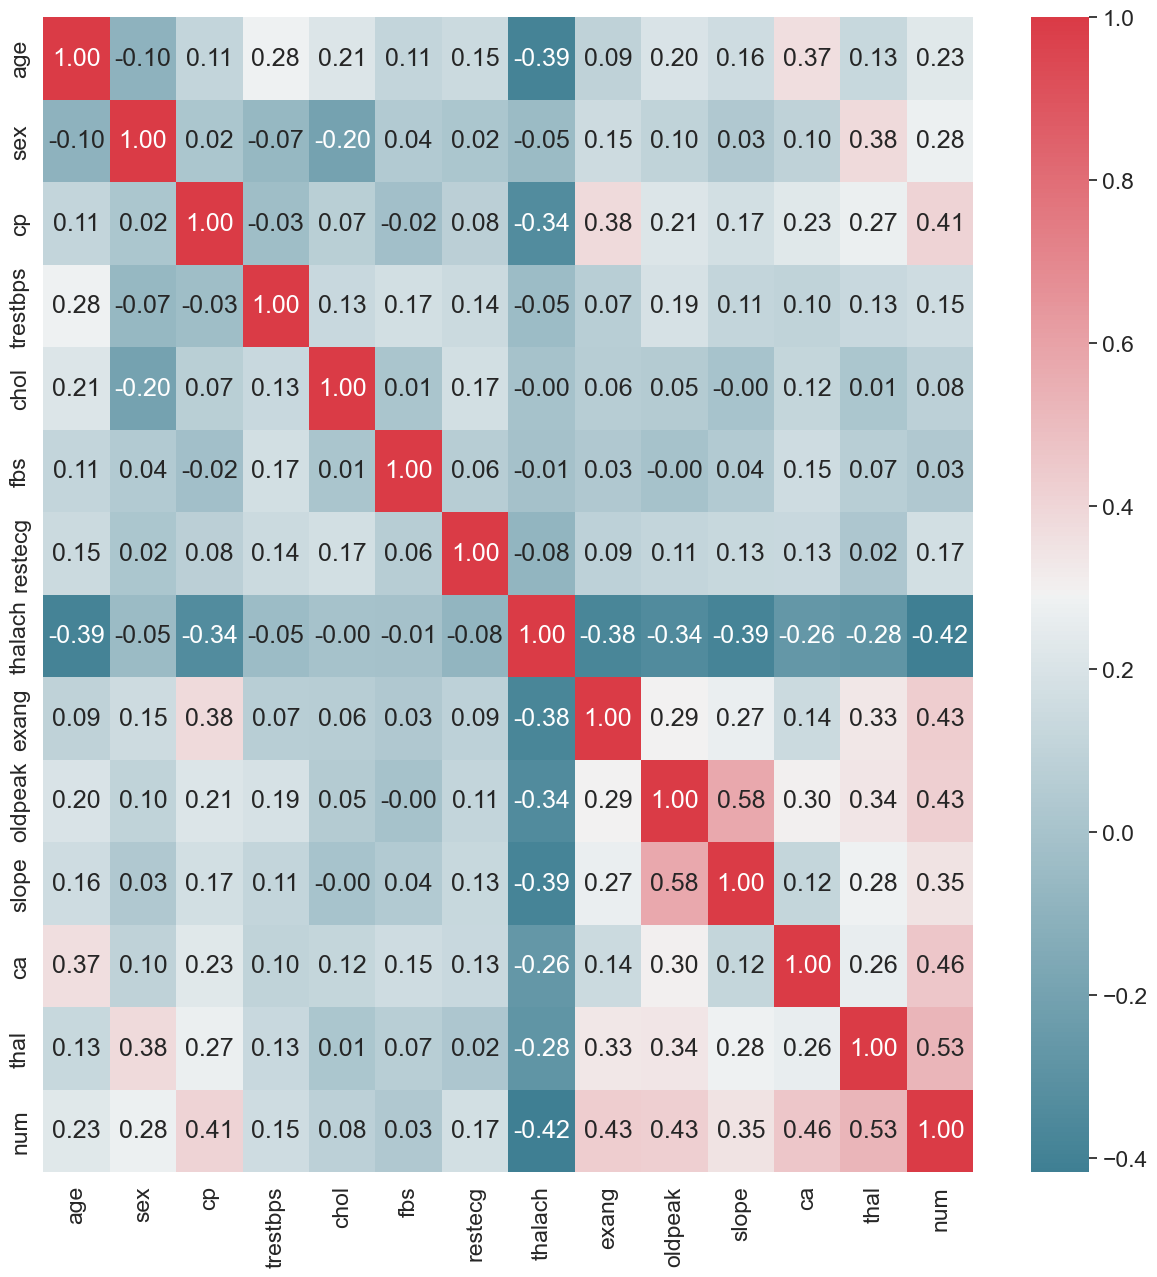

In [732]:
fig, ax1 = plt.subplots(1, figsize=(15, 15))
corr = dataset.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

In [733]:
X = dataset.drop(['num'], axis=1)
y = dataset['num']

In [734]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

In [735]:
RANDOM_STATE = 17
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('Cantidad de componentes necesarios: ', X_pca.shape[1])

Cantidad de componentes necesarios:  10


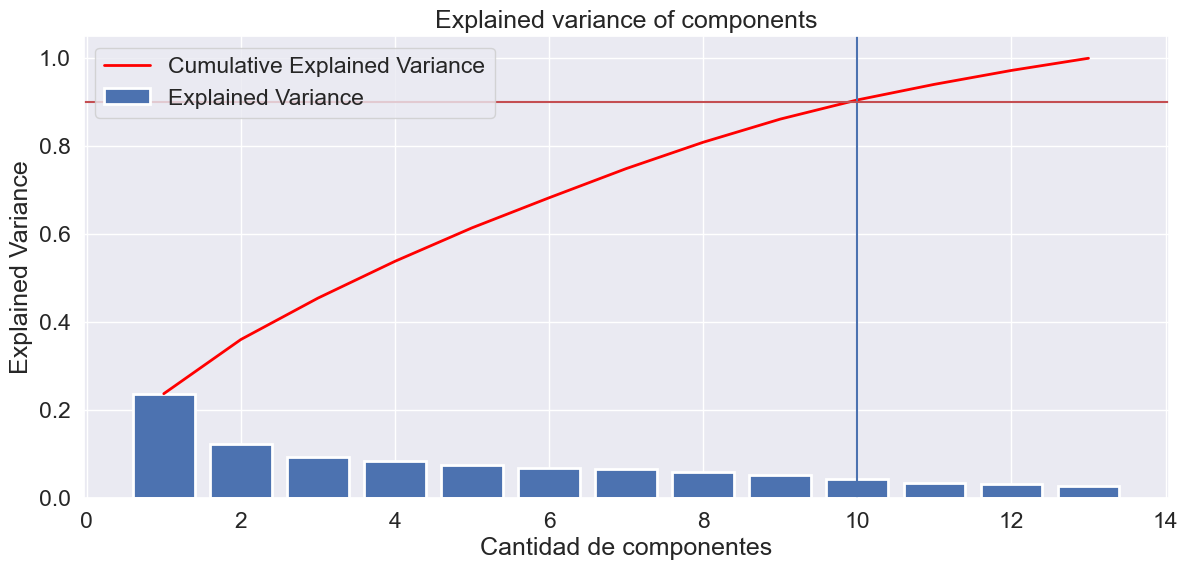

In [736]:
pca_2 = PCA(n_components=13, random_state=RANDOM_STATE).fit(X_scaled)
fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca_2.n_components_+1)
ax.bar(x_values, pca_2.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca_2.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.axvline(10, c='b')
plt.axhline(0.9, c='r')
ax.set_title('Explained variance of components')
ax.set_xlabel('Cantidad de componentes')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.show()

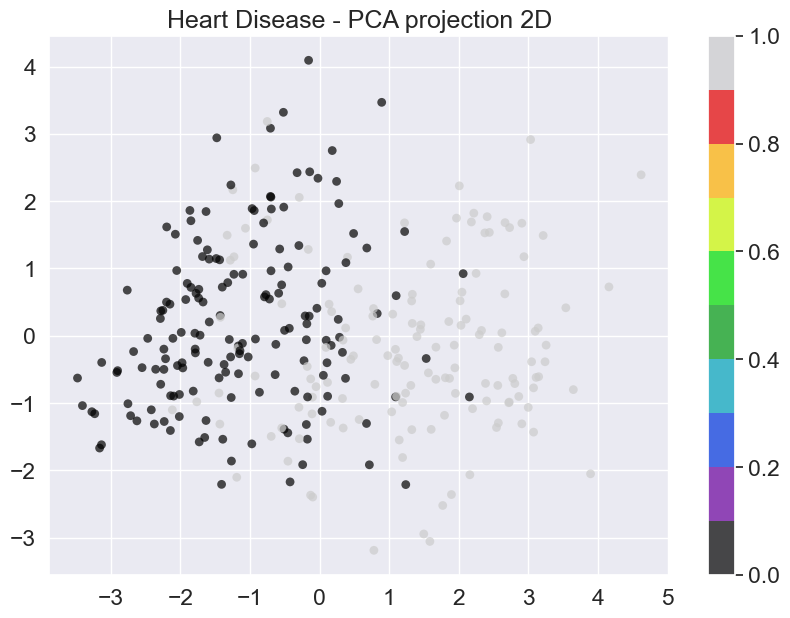

In [737]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(10,7))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

plt.title('Heart Disease - PCA projection 2D');

# Modelos y evaluación

Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [738]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor


In [739]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, test_size = 0.2, shuffle = True)

In [740]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

ElasticNet_score = elastic_net.score(X_test, y_test)
print('Score :', ElasticNet_score)
ElasticNet_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',ElasticNet_squared_error)
ElasticNet_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :',ElasticNet_r2)

Score : 0.11099163176479199
Mean Squared Error : 0.22219236292898234
R2 score : 0.11099163176479199


In [741]:
elastic_net_cv = ElasticNetCV(cv=10)
elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)


ElasticNetCV_score = elastic_net_cv.score(X_test, y_test)
print('Score :', ElasticNetCV_score)
ElasticNetCV_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',ElasticNetCV_squared_error)
ElasticNetCV_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :', ElasticNetCV_r2)

Score : 0.5147064747338806
Mean Squared Error : 0.12129077626914564
R2 score : 0.5147064747338806


In [742]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

LogisticRegression_score = logistic_regression.score(X_test, y_test)
print('Score :', LogisticRegression_score)
LogisticRegression_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',LogisticRegression_squared_error)
LogisticRegression_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :', LogisticRegression_r2)
print(metrics.classification_report(y_test, y_pred))

Score : 0.8524590163934426
Mean Squared Error : 0.14754098360655737
R2 score : 0.4096774193548386
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [743]:
logistic_regression_cv = LogisticRegressionCV(cv=10)
logistic_regression_cv.fit(X_train, y_train)

y_pred = logistic_regression_cv.predict(X_test)

LogisticRegressionCV_score = logistic_regression_cv.score(X_test, y_test)
print('Score :', LogisticRegressionCV_score)
LogisticRegressionCV_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',LogisticRegressionCV_squared_error)
LogisticRegressionCV_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :', LogisticRegressionCV_r2)
print(metrics.classification_report(y_test, y_pred))

Score : 0.8360655737704918
Mean Squared Error : 0.16393442622950818
R2 score : 0.34408602150537626
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.86      0.80      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [744]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

y_pred = sgd_classifier.predict(X_test)

SGDClassifier_score = sgd_classifier.score(X_test, y_test)
print('Score :', SGDClassifier_score)
SGDClassifier_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', SGDClassifier_squared_error)
SGDClassifier_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :', SGDClassifier_r2)
print(metrics.classification_report(y_test, y_pred))

Score : 0.7704918032786885
Mean Squared Error : 0.22950819672131148
R2 score : 0.08172043010752672
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.75      0.80      0.77        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [745]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)

SGDRegressor_score = sgd_regressor.score(X_test, y_test)
print('Score :', SGDRegressor_score)
SGDRegressor_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',SGDRegressor_squared_error)
SGDRegressor_r2 =  metrics.r2_score(y_test, y_pred)
print('R2 score :', SGDRegressor_r2)

Score : 0.5185972872606113
Mean Squared Error : 0.12031833454652818
R2 score : 0.5185972872606113


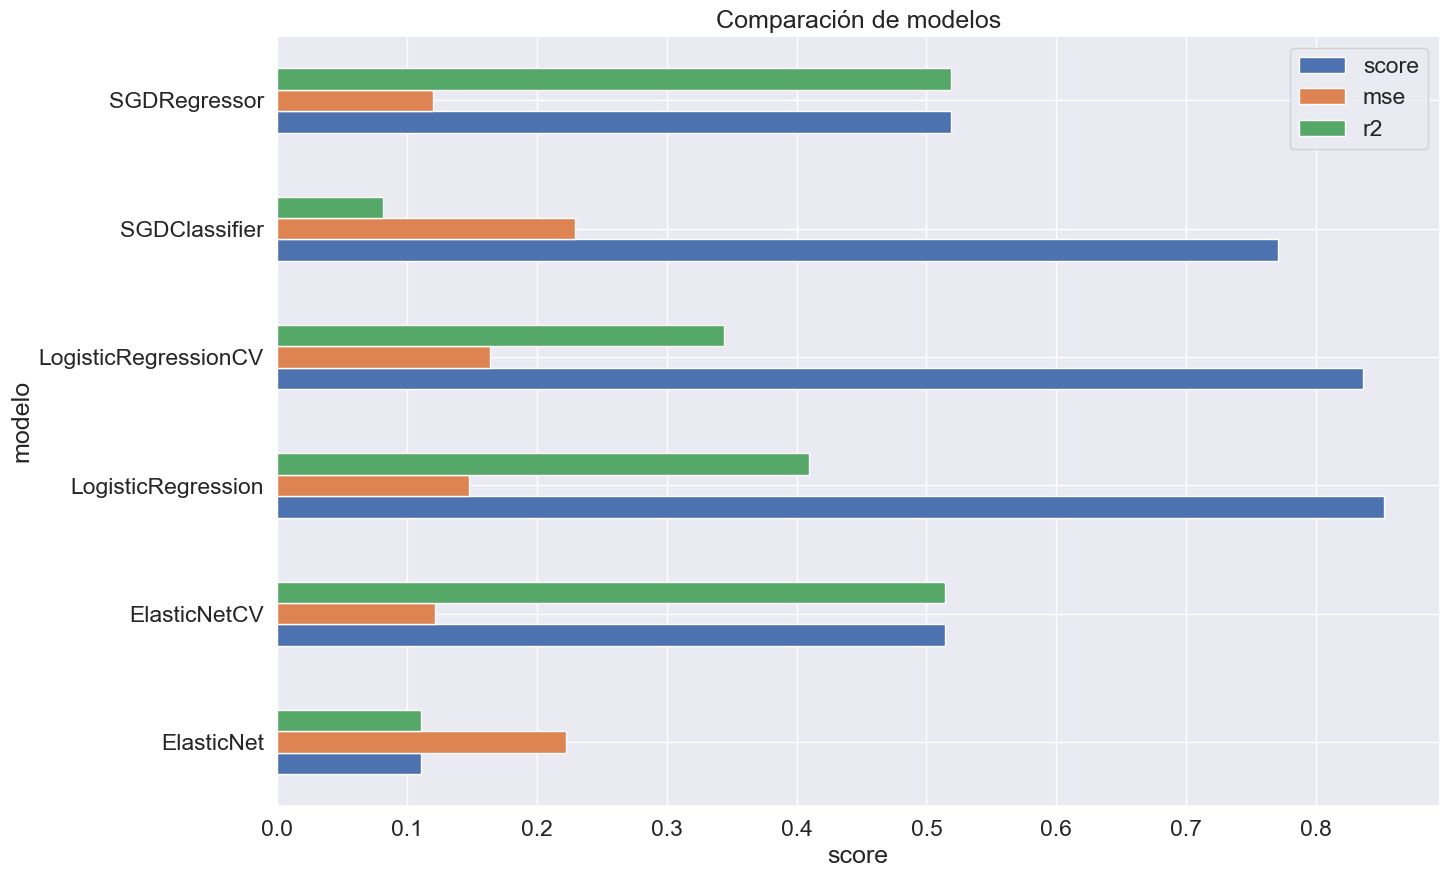

In [746]:
df_comparacion = pd.DataFrame({
                    'modelo': ['ElasticNet'            ,'ElasticNetCV'             , 'LogisticRegression'            , 'LogisticRegressionCV'            ,'SGDClassifier'             , 'SGDRegressor'],
                    'score' : [ElasticNet_score        , ElasticNetCV_score        , LogisticRegression_score        , LogisticRegressionCV_score        , SGDClassifier_score        , SGDRegressor_score],
                    'mse' :   [ElasticNet_squared_error, ElasticNetCV_squared_error, LogisticRegression_squared_error, LogisticRegressionCV_squared_error, SGDClassifier_squared_error, SGDRegressor_squared_error],
                    'r2' :    [ElasticNet_r2           , ElasticNetCV_r2           , LogisticRegression_r2           , LogisticRegressionCV_r2           , SGDClassifier_r2           , SGDRegressor_r2]   
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('score')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

Los modelos que mejor performaron son LogisticRegression, LogisticRegressionCS y SGDClassifier. Debido a que tienen el mayor score y menor mse.